In [11]:
pip install nltk seaborn

In [12]:
import unicodedata
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Download do recurso necessário para a análise de emoções
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
lista_texto = """
Resiliência
Mágico
Emocionante
Não sei
Trem
Curioso
AFETIVO
Mágico
Mágico
felicidade
Nostalgia
ENCANTO
Amor
NOSTALGIA
Felicidade
Voldemort
INFÂNCIA
Magia
INFÂNCIA
IMPRESSIONANTE
Mediano
EMOÇÃO
Encanto
nostalgia
Inspirador
Nostalgia
INFÂNCIA
Aventura
Nostalgia
Esperança
AVARACADABRA
Nostálgico
AMIZADE
INCRÍVEL
MÁGICO
HARRY
Angústia
APRISIONADO
OLHO TONTO
MARAVILHOSO
DIVERTIDO
NOSTALGIA
Curiosidade
MAGICO
MEMÓRIAS
Nostálgico
OK
NOSTALGIA
Mágico
Curiosidade
LEGAL
MÁGICO
MISTÉRIO
Infância
PICA
ACONCHEGO
MISTÉRIO
SURPRESA
Nostalgia
Alegria
INFÂNCIA
AVENTURA
Mágico
Começo e Nostalgia
Nostalgia
"""

lista_python = [item.strip() for item in lista_texto.strip().split("\n")]
print(lista_python)

['Resiliência', 'Mágico', 'Emocionante', 'Não sei', 'Trem', 'Curioso', 'AFETIVO', 'Mágico', 'Mágico', 'felicidade', 'Nostalgia', 'ENCANTO', 'Amor', 'NOSTALGIA', 'Felicidade', 'Voldemort', 'INFÂNCIA', 'Magia', 'INFÂNCIA', 'IMPRESSIONANTE', 'Mediano', 'EMOÇÃO', 'Encanto', 'nostalgia', 'Inspirador', 'Nostalgia', 'INFÂNCIA', 'Aventura', 'Nostalgia', 'Esperança', 'AVARACADABRA', 'Nostálgico', 'AMIZADE', 'INCRÍVEL', 'MÁGICO', 'HARRY', 'Angústia', 'APRISIONADO', 'OLHO TONTO', 'MARAVILHOSO', 'DIVERTIDO', 'NOSTALGIA', 'Curiosidade', 'MAGICO', 'MEMÓRIAS', 'Nostálgico', 'OK', 'NOSTALGIA', 'Mágico', 'Curiosidade', 'LEGAL', 'MÁGICO', 'MISTÉRIO', 'Infância', 'PICA', 'ACONCHEGO', 'MISTÉRIO', 'SURPRESA', 'Nostalgia', 'Alegria', 'INFÂNCIA', 'AVENTURA', 'Mágico', 'Começo e Nostalgia', 'Nostalgia']


In [13]:
lista_texto = """
Resilience
Magical
Exciting
I don't know
Train
Curious
Affectionate
Magical
Magical
Happiness
Nostalgia
Enchantment
Love
Nostalgia
Happiness
Voldemort
Childhood
Magic
Childhood
Impressive
Average
Emotion
Charm
Nostalgia
Inspiring
Nostalgia
Childhood
Adventure
Nostalgia
Hope
AVADA KEDAVRA
Nostalgic
Friendship
Amazing
Magical
Harry
Anguish
Imprisoned
Mad-Eye
Wonderful
Fun
Nostalgia
Curiosity
Magical
Memories
Nostalgic
OK
Nostalgia
Magical
Curiosity
Cool
Magical
Mystery
Childhood
Poke
Coziness
Mystery
Surprise
Nostalgia
Joy
Childhood
Adventure
Magical
Beginning and Nostalgia
Nostalgia
"""

lista_python = [item.strip() for item in lista_texto.strip().split("\n")]
print(lista_python)

['Resilience', 'Magical', 'Exciting', "I don't know", 'Train', 'Curious', 'Affectionate', 'Magical', 'Magical', 'Happiness', 'Nostalgia', 'Enchantment', 'Love', 'Nostalgia', 'Happiness', 'Voldemort', 'Childhood', 'Magic', 'Childhood', 'Impressive', 'Average', 'Emotion', 'Charm', 'Nostalgia', 'Inspiring', 'Nostalgia', 'Childhood', 'Adventure', 'Nostalgia', 'Hope', 'AVADA KEDAVRA', 'Nostalgic', 'Friendship', 'Amazing', 'Magical', 'Harry', 'Anguish', 'Imprisoned', 'Mad-Eye', 'Wonderful', 'Fun', 'Nostalgia', 'Curiosity', 'Magical', 'Memories', 'Nostalgic', 'OK', 'Nostalgia', 'Magical', 'Curiosity', 'Cool', 'Magical', 'Mystery', 'Childhood', 'Poke', 'Coziness', 'Mystery', 'Surprise', 'Nostalgia', 'Joy', 'Childhood', 'Adventure', 'Magical', 'Beginning and Nostalgia', 'Nostalgia']


# Normalização do texto


In [14]:

lista_python = [item.strip() for item in lista_texto.strip().split("\n")]

lista_normalizada = [re.sub(r'\s+', ' ', unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')).strip().upper() for texto in lista_python]

print(lista_normalizada)

['RESILIENCE', 'MAGICAL', 'EXCITING', "I DON'T KNOW", 'TRAIN', 'CURIOUS', 'AFFECTIONATE', 'MAGICAL', 'MAGICAL', 'HAPPINESS', 'NOSTALGIA', 'ENCHANTMENT', 'LOVE', 'NOSTALGIA', 'HAPPINESS', 'VOLDEMORT', 'CHILDHOOD', 'MAGIC', 'CHILDHOOD', 'IMPRESSIVE', 'AVERAGE', 'EMOTION', 'CHARM', 'NOSTALGIA', 'INSPIRING', 'NOSTALGIA', 'CHILDHOOD', 'ADVENTURE', 'NOSTALGIA', 'HOPE', 'AVADA KEDAVRA', 'NOSTALGIC', 'FRIENDSHIP', 'AMAZING', 'MAGICAL', 'HARRY', 'ANGUISH', 'IMPRISONED', 'MAD-EYE', 'WONDERFUL', 'FUN', 'NOSTALGIA', 'CURIOSITY', 'MAGICAL', 'MEMORIES', 'NOSTALGIC', 'OK', 'NOSTALGIA', 'MAGICAL', 'CURIOSITY', 'COOL', 'MAGICAL', 'MYSTERY', 'CHILDHOOD', 'POKE', 'COZINESS', 'MYSTERY', 'SURPRISE', 'NOSTALGIA', 'JOY', 'CHILDHOOD', 'ADVENTURE', 'MAGICAL', 'BEGINNING AND NOSTALGIA', 'NOSTALGIA']



# Gráfico dos sentimentos das pessoas segundo o algoritmo NLKT

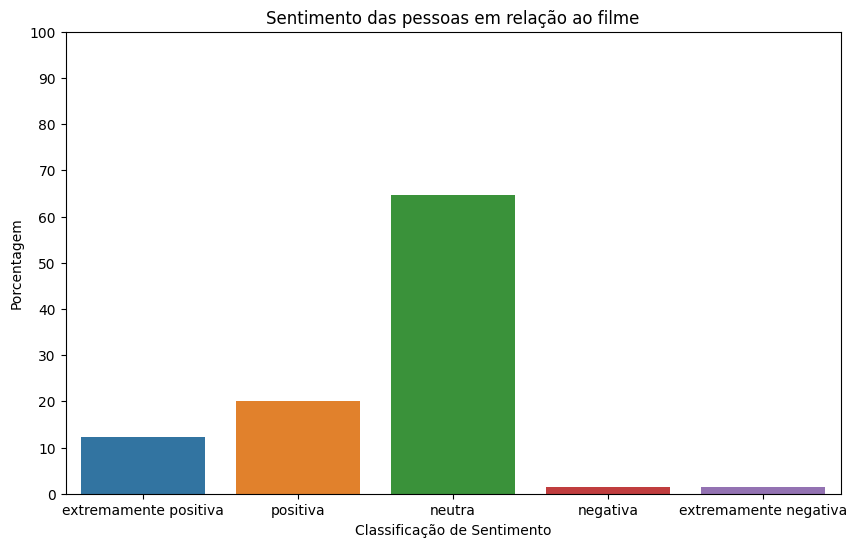

In [15]:
# Inicializar o analisador de sentimento VADER
sia = SentimentIntensityAnalyzer()

def get_sentiment_class(sentence):
    sentiment_score = sia.polarity_scores(sentence)['compound']
    if sentiment_score >= 0.5:
        return 'extremamente positiva'
    elif 0.1 <= sentiment_score < 0.5:
        return 'positiva'
    elif -0.1 <= sentiment_score < 0.1:
        return 'neutra'
    elif -0.5 <= sentiment_score < -0.1:
        return 'negativa'
    else:
        return 'extremamente negativa'


sentiment_counts = {'extremamente positiva': 0, 'positiva': 0, 'neutra': 0, 'negativa': 0, 'extremamente negativa': 0}

for word in lista_normalizada:
    sentiment_class = get_sentiment_class(word)
    sentiment_counts[sentiment_class] += 1


total_samples = len(lista_normalizada)
percentage_counts = {key: (value / total_samples) * 100 for key, value in sentiment_counts.items()}


plt.figure(figsize=(10, 6))
sns.barplot(x=list(percentage_counts.keys()), y=list(percentage_counts.values()))

plt.yticks(range(0, 101, 10))

plt.xlabel('Classificação de Sentimento')
plt.ylabel('Porcentagem')
plt.title('Sentimento das pessoas em relação ao filme')
plt.show()